# 2019 Mitch Watch

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from scipy.interpolate import make_interp_spline, BSpline

sns.set(style="whitegrid", 
        palette="pastel", 
        font='Circular Spotify Text', 
        font_scale = 1.1, 
        rc= {'grid.color': '.95', 'xtick.color': '.3', 'ytick.color': '.3'})


In [23]:
team_colors = {
    'SF': '#AA0000',
    'KC': '#000000',
    'ARI': '#000000',
    'ATL': '#000000',
    'BAL': '#241773',
    'PHI': '#004953',
    'NYG': '#0B2265',
    'NO': '#9F8958',
    'NE': '#002244',
    'MIN': '#4F2683',
    'MIA': '#008E97',
    'IND': '#002C5F',
    'CLE': '#FB4F14',
    'LAC': '#002244',
    'DEN': '#002244',
    'CAR': '#0085CA',
    'GB': '#203731',
    'DET': '#005A8B',
    'OAK': '#A5ACAF',
    'CIN': '#FB4F14',
    'WAS': '#773141',
    'TEN': '#002244',
    'TB': '#000000',
    'PIT': '#FFB612',
    'NYJ': '#203731',
    'BUF': '#00338D',
    'LA': '#002244',
    'JAX': '#006778',
    'DAL': '#002244',
    'CHI': '#0B162A',
    'HOU': '#03202F',
    'SEA': '#002244'
}

team_colors_main = {
    'SF': '#AA0000',
    'KC': '#E31837',
    'ARI': '#97233F',
    'ATL': '#A71930',
    'BAL': '#241773',
    'PHI': '#004953',
    'NYG': '#0B2265',
    'NO': '#9F8958',
    'NE': '#002244',
    'MIN': '#4F2683',
    'MIA': '#008E97',
    'IND': '#002C5F',
    'CLE': '#FB4F14',
    'LAC': '#002244',
    'DEN': '#002244',
    'CAR': '#0085CA',
    'GB': '#203731',
    'DET': '#005A8B',
    'OAK': '#A5ACAF',
    'CIN': '#FB4F14',
    'WAS': '#773141',
    'TEN': '#002244',
    'TB': '#D50A0A',
    'PIT': '#FFB612',
    'NYJ': '#203731',
    'BUF': '#00338D',
    'LA': '#002244',
    'JAX': '#006778',
    'DAL': '#002244',
    'CHI': '#0B162A',
    'HOU': '#03202F',
    'SEA': '#002244'
}

team_colors_gray = {
    
    'SF': '#AA0000',
    'KC': '#D9D9D9',
    'ARI': '#D9D9D9',
    'ATL': '#D9D9D9',
    'BAL': '#D9D9D9',
    'PHI': '#D9D9D9',
    'NYG': '#D9D9D9',
    'NO': '#D9D9D9',
    'NE': '#D9D9D9',
    'MIN': '#D9D9D9',
    'MIA': '#D9D9D9',
    'IND': '#D9D9D9',
    'CLE': '#D9D9D9',
    'LAC': '#D9D9D9',
    'DEN': '#D9D9D9',
    'CAR': '#D9D9D9',
    'GB': '#D9D9D9',
    'DET': '#D9D9D9',
    'OAK': '#D9D9D9',
    'CIN': '#D9D9D9',
    'WAS': '#D9D9D9',
    'TEN': '#D9D9D9',
    'TB': '#D9D9D9',
    'PIT': '#D9D9D9',
    'NYJ': '#D9D9D9',
    'BUF': '#D9D9D9',
    'LA': '#D9D9D9',
    'JAX': '#D9D9D9',
    'DAL': '#D9D9D9',
    'CHI': '#D9D9D9',
    'HOU': '#D9D9D9',
    'SEA': '#D9D9D9'
}

## Data

In [103]:
df = pd.read_csv("../data/reg_pbp_2019.csv", low_memory=False)

## EPA per punt

In [104]:
df_punts = df[df['play_type'] == 'punt']

In [105]:
(df_punts.loc[:,['home_team', 
                 'away_team', 
                 'posteam', 
                 'punter_player_name', 
                 'punt_downed',
                 'epa', 
                 'return_yards', 
                 'fumble',
                 'kick_distance'
                ]]
 .sort_values('epa', ascending=False)
 .head(20))

,home_team,away_team,posteam,punter_player_name,punt_downed,epa,return_yards,fumble,kick_distance
1617,SEA,CIN,SEA,M.Dickson,0.0,5.746275,9,1.0,43.0
960,MIA,BAL,BAL,S.Koch,0.0,5.389219,0,1.0,56.0
1526,LAC,IND,IND,R.Sanchez,0.0,4.850979,0,1.0,39.0
2184,ARI,DET,ARI,A.Lee,0.0,4.129043,0,1.0,53.0
1694,SEA,CIN,SEA,M.Dickson,1.0,2.645086,0,0.0,54.0
2529,NO,HOU,HOU,T.Daniel,0.0,2.640747,5,0.0,54.0
926,MIA,BAL,MIA,M.Haack,0.0,2.316751,0,0.0,58.0
648,NYJ,BUF,NYJ,L.Edwards,1.0,2.082166,0,0.0,53.0
2353,NE,PIT,NE,J.Bailey,0.0,1.977872,0,0.0,53.0
133,CHI,GB,CHI,P.O'Donnell,0.0,1.977087,0,0.0,53.0


In [106]:
df_punts.groupby(['punter_player_name', 'posteam'])['epa'].mean().reset_index().sort_values('epa', ascending=False)

,punter_player_name,posteam,epa
26,S.Koch,BAL,5.389219
25,R.Sanchez,IND,1.533048
29,T.Long,LAC,1.275207
19,M.Dickson,SEA,1.157406
20,M.Haack,MIA,1.060304
1,A.Lee,ARI,0.978877
16,L.Cooke,JAX,0.946951
8,C.Wadman,DEN,0.591714
28,T.Daniel,HOU,0.540479
6,C.Johnston,PHI,0.501610


## Return yards per punt

In [107]:
df_punts.groupby(['punter_player_name', 'posteam'])['return_yards'].mean().reset_index().sort_values('return_yards', ascending=True)

,punter_player_name,posteam,return_yards
1,A.Lee,ARI,-0.250000
0,A.Cole,OAK,0.000000
26,S.Koch,BAL,0.000000
25,R.Sanchez,IND,0.000000
24,R.Dixon,NYG,0.000000
22,M.Wishnowsky,SF,0.000000
18,M.Bosher,ATL,0.000000
16,L.Cooke,JAX,0.000000
30,T.Morstead,NO,0.000000
12,J.Gillan,CLE,0.000000


## Punt distance

In [108]:
df_punts.groupby(['punter_player_name', 'posteam'])['kick_distance'].mean().reset_index().sort_values('kick_distance', ascending=False)

,punter_player_name,posteam,kick_distance
26,S.Koch,BAL,56.000000
31,T.Way,WAS,54.400000
20,M.Haack,MIA,53.666667
6,C.Johnston,PHI,51.333333
2,B.Colquitt,MIN,49.400000
29,T.Long,LAC,49.000000
21,M.Palardy,CAR,48.625000
8,C.Wadman,DEN,48.333333
13,J.Hekker,LA,48.000000
16,L.Cooke,JAX,48.000000


## Charts — EPA/punt vs avg. return yards

In [109]:
data = df_punts.groupby(['posteam'])['epa', 'return_yards'].mean().reset_index()
data.head()

,posteam,epa,return_yards
0,ARI,0.978877,-0.250000
1,ATL,-0.764629,0.000000
2,BAL,5.389219,0.000000
3,BUF,-0.462910,0.000000
4,CAR,0.423106,4.444444


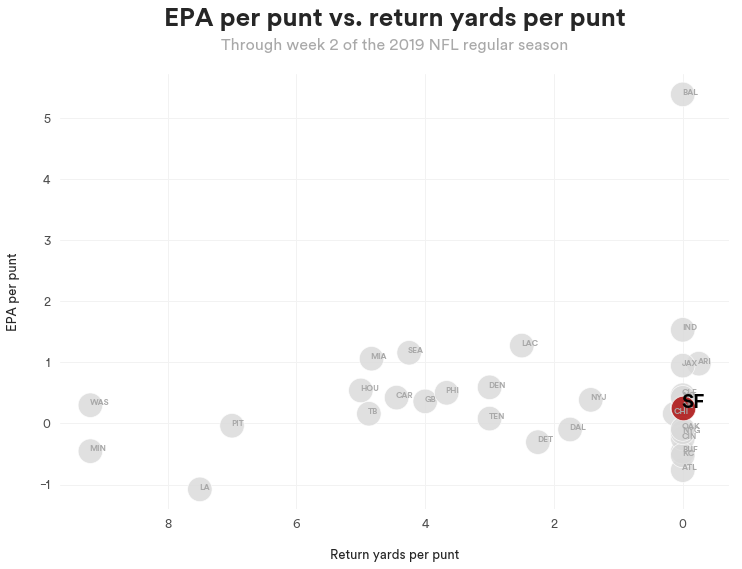

In [110]:
f, ax = plt.subplots(figsize=(12, 8))

# Plotting all other teams and adding names

others = data[data['posteam'] != 'SF'].reset_index()

ax = sns.scatterplot(x="return_yards", 
                     y="epa",
                     hue="posteam", 
                     palette=team_colors_gray,
                     data=others,
                     legend=False,
                     alpha=0.8,
                     s=600
                    )


#ax.set_title('EPA per punt vs. return yards per punt\n', fontsize=22, weight='black')
ax.text(x=0.5, y=1.1, s='EPA per punt vs. return yards per punt', fontsize=26, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Through week 2 of the 2019 NFL regular season', fontsize=16, color='darkgray', ha='center', va='bottom', transform=ax.transAxes)

plt.xlim(reversed(plt.xlim()))


for line in range(0,others.shape[0]):
     ax.text(others['return_yards'][line]+0.015, others['epa'][line], others['posteam'][line], horizontalalignment='left', size='small', color='darkgray', weight='semibold')
        
# Plotting and labeling SF
        
ax = sns.scatterplot(x="return_yards", 
                     y="epa",
                     hue="posteam", 
                     palette=team_colors_gray,
                     data=data[data['posteam'] == 'SF'],
                     legend=False,
                     alpha=0.8,
                     s=600
                    )

ax.set_ylabel('EPA per punt\n')
ax.set_xlabel('\nReturn yards per punt')

ax.text(data[data['posteam'] == 'SF']['return_yards']+0.015, data[data['posteam'] == 'SF']['epa'], data[data['posteam'] == 'SF']['posteam'].values[0], horizontalalignment='left', size=20, color='black', weight='semibold')
sns.despine(left=True, right=True, top=True, bottom=True)

In [111]:
data = df_punts.groupby(['posteam'])['epa', 'kick_distance'].mean().reset_index().dropna()
data.head()

,posteam,epa,kick_distance
0,ARI,0.978877,46.142857
1,ATL,-0.764629,43.333333
2,BAL,5.389219,56.000000
3,BUF,-0.462910,35.000000
4,CAR,0.423106,48.625000


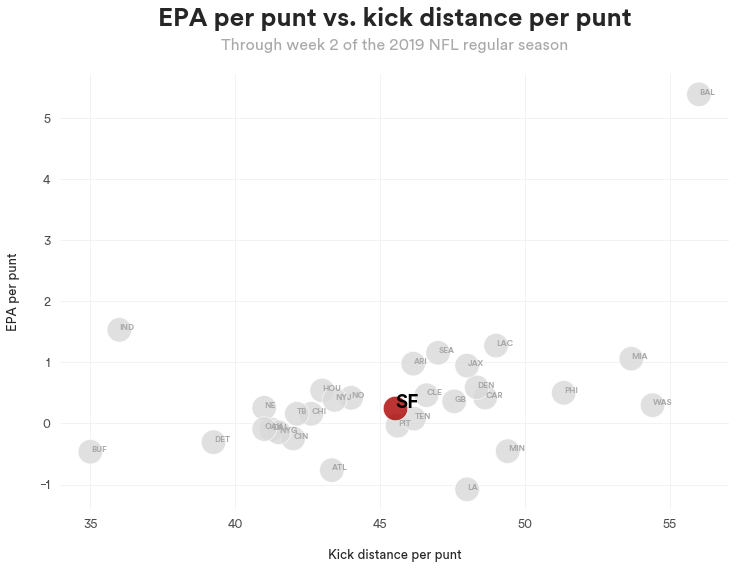

In [112]:
f, ax = plt.subplots(figsize=(12, 8))

# Plotting all other teams and adding names

others = data[data['posteam'] != 'SF'].reset_index()

ax = sns.scatterplot(x="kick_distance", 
                     y="epa",
                     hue="posteam", 
                     palette=team_colors_gray,
                     data=others,
                     legend=False,
                     alpha=0.8,
                     s=600
                    )


#ax.set_title('EPA per punt vs. return yards per punt\n', fontsize=22, weight='black')
ax.text(x=0.5, y=1.1, s='EPA per punt vs. kick distance per punt', fontsize=26, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Through week 2 of the 2019 NFL regular season', fontsize=16, color='darkgray', ha='center', va='bottom', transform=ax.transAxes)

#plt.xlim(reversed(plt.xlim()))


for line in range(0,others.shape[0]):
     ax.text(others['kick_distance'][line]+0.015, others['epa'][line], others['posteam'][line], horizontalalignment='left', size='small', color='darkgray', weight='semibold')
        
# Plotting and labeling SF
        
ax = sns.scatterplot(x="kick_distance", 
                     y="epa",
                     hue="posteam", 
                     palette=team_colors_gray,
                     data=data[data['posteam'] == 'SF'],
                     legend=False,
                     alpha=0.8,
                     s=600
                    )

ax.set_ylabel('EPA per punt\n')
ax.set_xlabel('\nKick distance per punt')

ax.text(data[data['posteam'] == 'SF']['kick_distance']+0.015, data[data['posteam'] == 'SF']['epa'], data[data['posteam'] == 'SF']['posteam'].values[0], horizontalalignment='left', size=20, color='black', weight='semibold')
sns.despine(left=True, right=True, top=True, bottom=True)